In [15]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

**Zadanie 1**

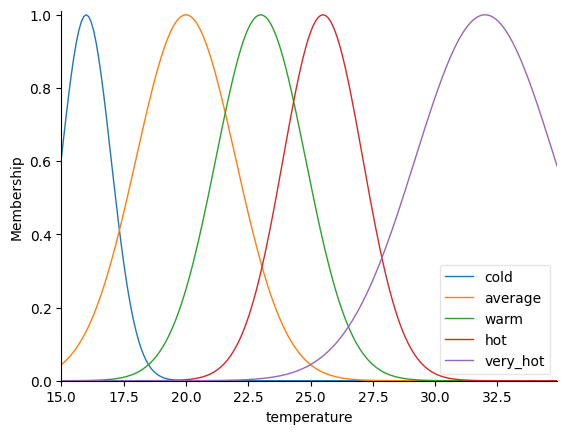

In [16]:
temperature  = ctrl.Antecedent(np.arange(15, 35, 0.1),'temperature')
temperature['cold'] = fuzz.gaussmf(temperature.universe, 16, 1)
temperature['average'] = fuzz.gaussmf(temperature.universe, 20, 2)
temperature['warm'] = fuzz.gaussmf(temperature.universe, 23, 1.8)
temperature['hot'] = fuzz.gaussmf(temperature.universe, 25.5, 1.6)
temperature['very_hot'] = fuzz.gaussmf(temperature.universe, 32, 2.8)

temperature.view()

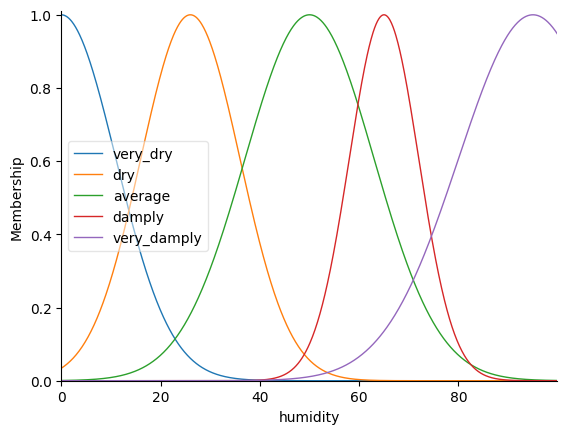

In [ ]:
humidity  = ctrl.Antecedent(np.arange(0, 100, 0.1),'humidity')
humidity['very_dry'] = fuzz.gaussmf(humidity.universe, 0, 11)
humidity['dry'] = fuzz.gaussmf(humidity.universe, 26, 10)
humidity['average'] = fuzz.gaussmf(humidity.universe, 50, 13)
humidity['damply'] = fuzz.gaussmf(humidity.universe, 65, 7)
humidity['very_damply'] = fuzz.gaussmf(humidity.universe, 95, 15)
humidity.view()

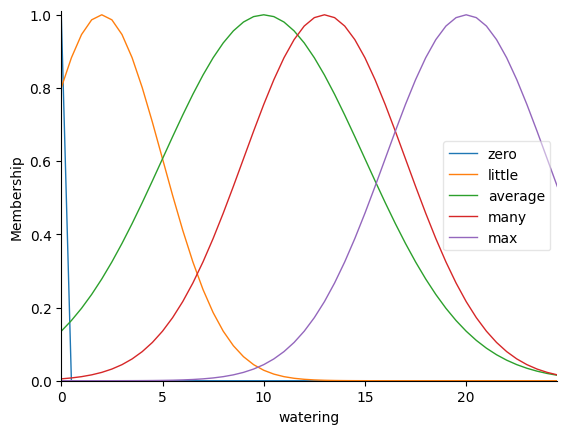

In [ ]:
watering  = ctrl.Consequent(np.arange(0, 25, 0.5),'watering')
watering['zero'] = fuzz.gaussmf(watering.universe, 0, 0.01)
watering['little'] = fuzz.gaussmf(watering.universe, 2, 3)
watering['average'] = fuzz.gaussmf(watering.universe, 10, 5)
watering['many'] = fuzz.gaussmf(watering.universe, 13, 4)
watering['max'] = fuzz.gaussmf(watering.universe, 20, 4)

watering.view()

<Axes: xlabel='humidity', ylabel='temperature'>

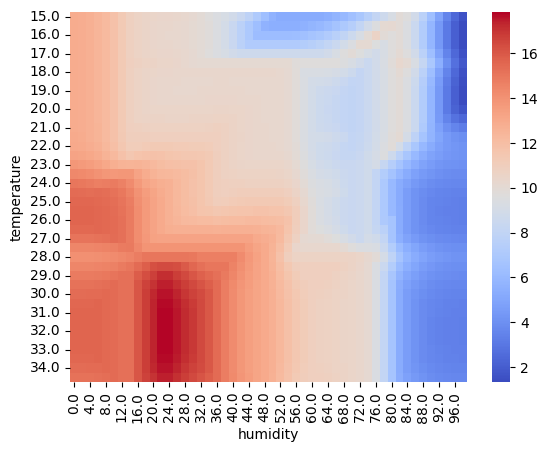

In [17]:
rule1 = ctrl.Rule(humidity['very_dry'], watering['many'])
rule2 = ctrl.Rule(humidity['very_dry'] & temperature['average'], watering['many'])
rule3 = ctrl.Rule(humidity['very_dry'] & temperature['warm'], watering['many'])
rule4 = ctrl.Rule(humidity['very_dry'] & temperature['hot'], watering['max'])
rule5 = ctrl.Rule(humidity['very_dry'] & temperature['very_hot'], watering['max'])

rule6 = ctrl.Rule(humidity['dry'] & temperature['cold'], watering['average'])
rule7 = ctrl.Rule(humidity['dry'] & temperature['average'], watering['average'])
rule8 = ctrl.Rule(humidity['dry'] & temperature['warm'], watering['many'])
rule9 = ctrl.Rule(humidity['dry'] & temperature['hot'], watering['many'])
rule10 = ctrl.Rule(humidity['dry'] & temperature['very_hot'], watering['max'])

rule11 = ctrl.Rule(humidity['average'] & temperature['cold'], watering['little'])
rule12 = ctrl.Rule(humidity['average'] & temperature['average'], watering['average'])
rule13 = ctrl.Rule(humidity['average'] & temperature['warm'], watering['average'])
rule14 = ctrl.Rule(humidity['average'] & temperature['hot'], watering['many'])
rule15 = ctrl.Rule(humidity['average'] & temperature['very_hot'], watering['many'])

rule16 = ctrl.Rule(humidity['damply'] & temperature['cold'], watering['zero'])
rule17 = ctrl.Rule(humidity['damply'] & temperature['average'], watering['little'])
rule18 = ctrl.Rule(humidity['damply'] & temperature['warm'], watering['little'])
rule19 = ctrl.Rule(humidity['damply'] & temperature['hot'], watering['little'])
rule20 = ctrl.Rule(humidity['damply'] & temperature['very_hot'], watering['average'])

rule21 = ctrl.Rule(humidity['very_damply'] & temperature['cold'], watering['zero'])
rule22 = ctrl.Rule(humidity['very_damply'] & temperature['average'], watering['zero'])
rule23 = ctrl.Rule(humidity['very_damply'] & temperature['warm'], watering['zero'])
rule24 = ctrl.Rule(humidity['very_damply'] & temperature['hot'], watering['little'])
rule25 = ctrl.Rule(humidity['very_damply'] & temperature['very_hot'], watering['little'])


control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4,rule5, rule6,rule7, rule8,rule9, rule10,rule11, rule12,rule13, rule14,
                                     rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])
model = ctrl.ControlSystemSimulation(control_system)



people_grid, hour_grid = np.meshgrid(np.arange(0,100,2), np.arange(15, 35, 0.5))
test_points = np.transpose(np.vstack((np.ravel(people_grid),np.ravel(hour_grid))))

model.input['humidity'] = test_points[:,0]
model.input['temperature'] = test_points[:,1]

model.compute()
test_points = np.concatenate((test_points, model.output['watering'].reshape(-1,1)), axis=1)

sns.heatmap(pd.DataFrame(test_points, columns = ['humidity','temperature', 'watering']).pivot(index='temperature', columns='humidity', values='watering'), cmap = 'coolwarm')

**Zadanie 2**

In [ ]:
downfall = ctrl.Antecedent(np.arange(0, 12, 0.5),'downfall')
downfall['low'] = fuzz.gaussmf(downfall.universe, 0, 1.5)
downfall['medium'] = fuzz.gaussmf(downfall.universe, 6, 3)
downfall['high'] = fuzz.gaussmf(downfall.universe, 12, 1.5)
downfall.view()
plt.savefig('opady.png')
plt.close()

rule27 = ctrl.Rule(downfall['medium'], watering['little'])
rule28 = ctrl.Rule(downfall['high'] | humidity['very_damply'], watering['zero'])
rule29 = ctrl.Rule(humidity['very_damply'] & downfall['low'], watering['average'])
rule30 = ctrl.Rule(temperature['very_hot'] & (downfall['low'] | downfall['medium']), watering['max'])

control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4,rule5, rule6,
                                     rule7, rule8,rule9, rule10,rule11, rule12,
                                     rule13, rule14, rule15, rule16, rule17,
                                     rule18, rule19, rule20, rule21, rule22,
                                     rule23, rule24, rule25, rule27,
                                     rule28, rule29, rule30])

for i in [0, 4, 8, 12]:
  model = ctrl.ControlSystemSimulation(control_system)
  humidity_grid, temperature_grid = np.meshgrid(np.arange(30,70,1), np.arange(15, 35, 0.5))
  test_points = np.transpose(np.vstack((np.ravel(humidity_grid),np.ravel(temperature_grid))))
  model.input['humidity'] = test_points[:,0]
  model.input['temperature'] = test_points[:,1]
  model.input['downfall'] = np.array([i]*1600)

  model.compute()
  test_points = np.concatenate((test_points, model.output['watering'].reshape(-1,1)), axis=1)

  sns.heatmap(pd.DataFrame(test_points, columns = ['humidity','temperature', 'watering']).pivot(index='humidity', columns='temperature', values='watering'), cmap = 'coolwarm')
  plt.savefig(str(i)+'.png')
  plt.close()

**Zadanie 3**

        averagePm10  averageAirTemp  averageRelativeHumidity  \
min        1.291562      -10.138125                27.660208   
max      111.947047       28.719792                83.079306   
mean      21.430156       10.545270                61.452676   
median    14.964705       10.426389                62.812743   

        averageWindSpeed  rainAccumulation  
min             0.540486          0.000000  
max             5.498264         95.060000  
mean            1.623894          1.317936  
median          1.499167          0.000000  


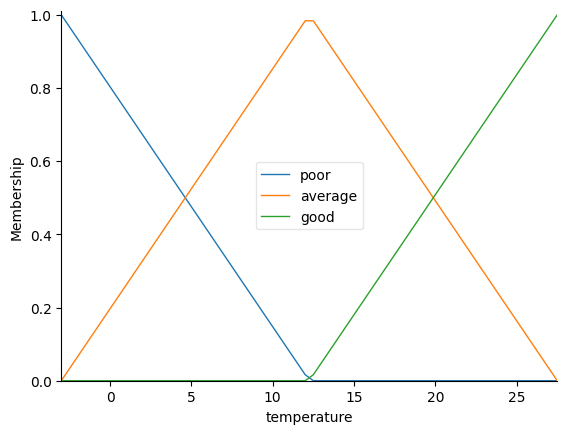

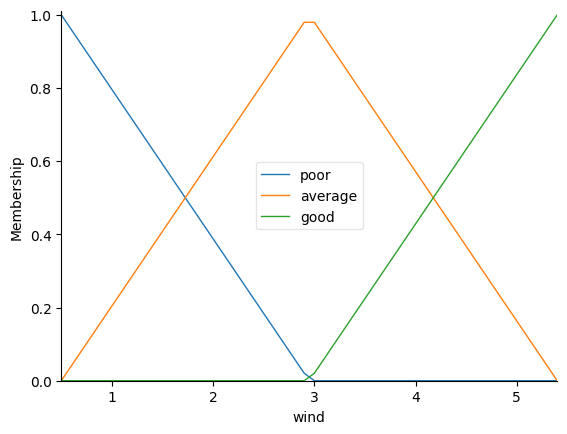

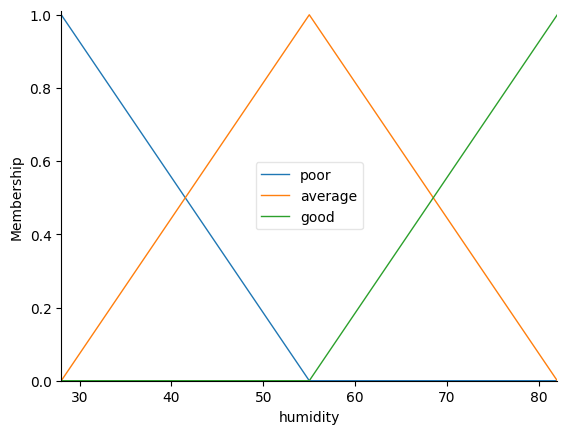

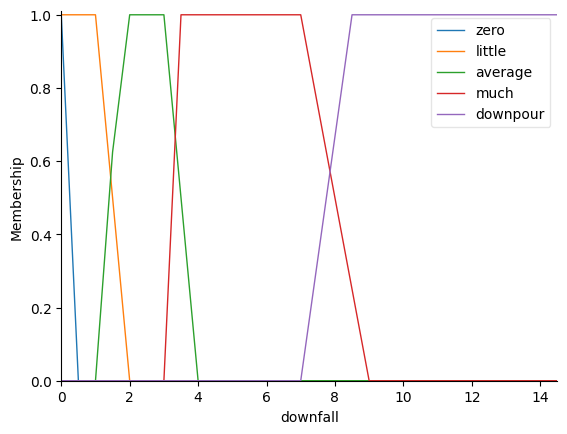

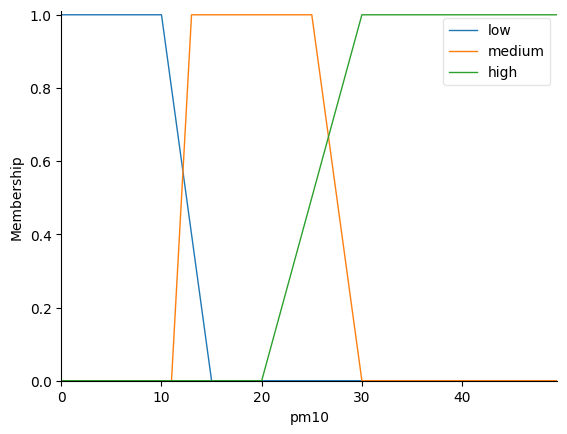

In [ ]:
data = pd.read_csv('dane_pogodowe.csv')
data = data.drop(['time'], axis=1)
print(data.apply(lambda s: pd.Series([s.min(), s.max(), s.mean(), s.median()], index=['min', 'max', 'mean', 'median'])))

temperature  = ctrl.Antecedent(np.arange(-3, 28, 0.5),'temperature')
temperature.automf(3)
temperature.view()

wind = ctrl.Antecedent(np.arange(0.5, 5.5, 0.1),'wind')
wind.automf(3)
wind.view()

humidity = ctrl.Antecedent(np.arange(28, 83, 1),'humidity')
humidity.automf(3)
humidity.view()

downfall = ctrl.Antecedent(np.arange(0, 15, 0.5),'downfall')
downfall['zero'] = fuzz.trapmf(downfall.universe, [0,0,0,0])
downfall['little'] = fuzz.trapmf(downfall.universe,[0,0,1,2])
downfall['average'] = fuzz.trapmf(downfall.universe,[1,1.8,3,4])
downfall['much'] = fuzz.trapmf(downfall.universe,[3,3.5,7,9])
downfall['downpour'] = fuzz.trapmf(downfall.universe, [7, 8.5, 15,15])
downfall.view()

pm10 = ctrl.Consequent(np.arange(0, 50, 0.5),'pm10')
pm10['low'] = fuzz.trapmf(pm10.universe, [0, 0, 10, 15])
pm10['medium'] = fuzz.trapmf(pm10.universe, [11,13,25,30] )
pm10['high'] = fuzz.trapmf(pm10.universe, [20,30,50,50])
pm10.view()

Model proponuje pm10 na poziomie:  6.635730708752339


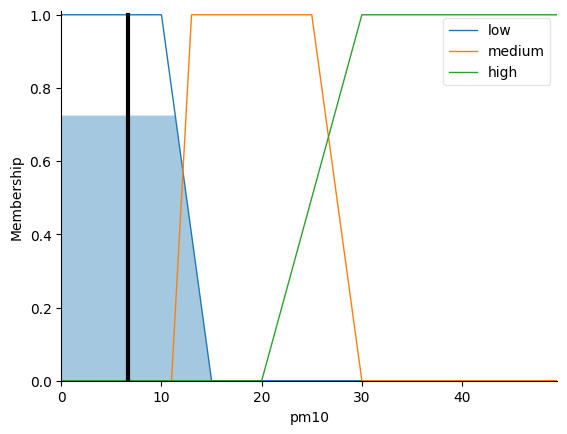

In [ ]:
rule1 = ctrl.Rule(temperature['poor'] & wind['poor'], pm10['high'])
rule2 = ctrl.Rule(downfall['downpour'], pm10['low'])
rule3 = ctrl.Rule(wind['good'] | wind['average'], pm10['low'])
rule4 = ctrl.Rule(temperature['good'] & (humidity['good'] | humidity['average']), pm10['low'])
rule5 = ctrl.Rule((downfall['little'] | downfall['average']) & (humidity['average']), pm10['medium'])
rule6 = ctrl.Rule(downfall['zero'] & (temperature['poor'] | wind['poor']), pm10['high'])

temperature_grid, wind_grid = np.meshgrid(np.arange(-10,30,1), np.arange(0, 10, 0.5))
test_points = np.transpose(np.vstack((np.ravel(temperature_grid),np.ravel(wind_grid))))

control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])

model = ctrl.ControlSystemSimulation(control_system)

model.input['temperature'] = 23.3
model.input['humidity'] = 53.98
model.input['wind'] = 1.71
model.input['downfall'] = 4.27

# oblicz:
model.compute()

# wypisz wynik i przedstaw wynik graficznie:
print('Model proponuje pm10 na poziomie: ',model.output['pm10'])
pm10.view(sim=model)

**Zadanie 4**

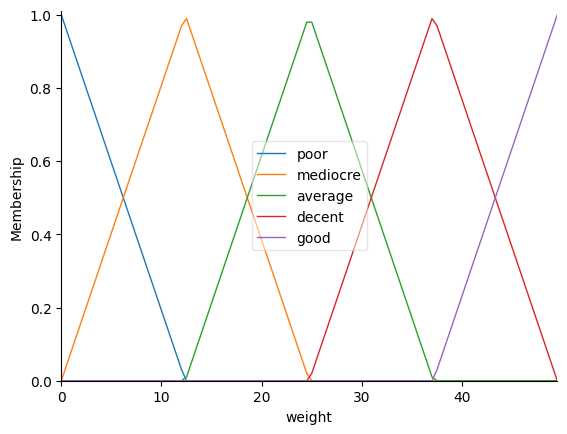

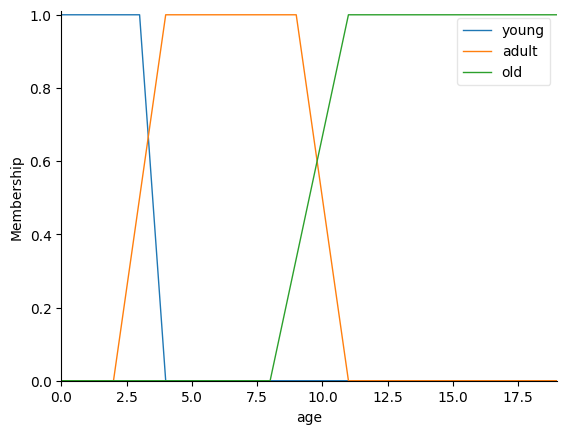

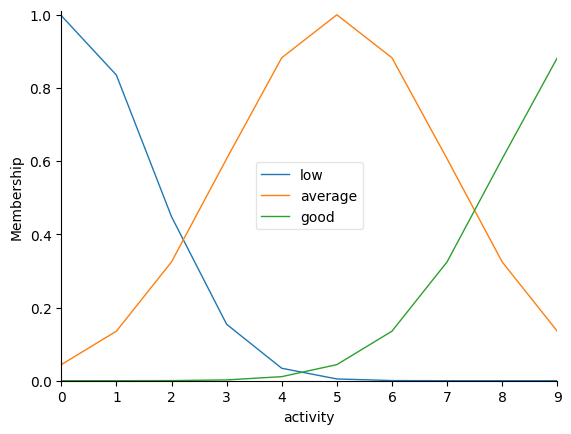

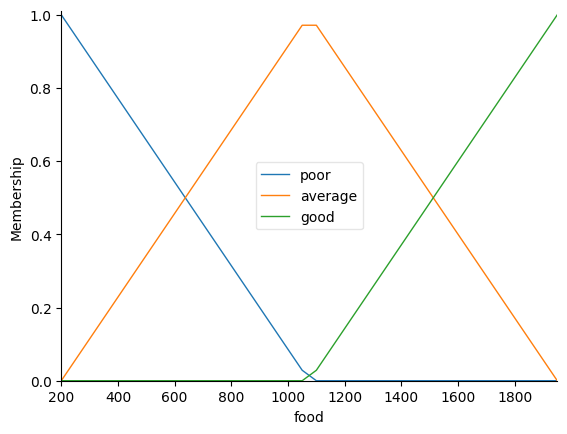

In [ ]:
weight = ctrl.Antecedent(np.arange(0, 50, 0.5),'weight')
weight.automf(5)
age = ctrl.Antecedent(np.arange(0, 20, 1),'age')
age['young'] = fuzz.trapmf(age.universe,[0,0,3,3])
age['adult'] = fuzz.trapmf(age.universe,[2, 4, 9, 11])
age['old'] = fuzz.trapmf(age.universe,[8,11,20,20])
activity = ctrl.Antecedent(np.arange(0, 10, 1), 'activity')
activity['low'] = fuzz.gaussmf(activity.universe, 0.1, 1.5)
activity['average'] = fuzz.gaussmf(activity.universe, 5, 2)
activity['good'] = fuzz.gaussmf(activity.universe, 10, 2)
food = ctrl.Consequent(np.arange(200, 2000, 50), 'food')
food.automf(3)
weight.view()
age.view()
activity.view()
food.view()

<Axes: xlabel='activity', ylabel='age'>

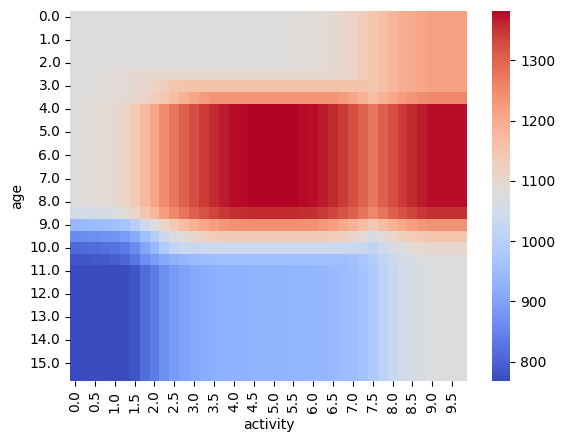

In [ ]:
rule1 = ctrl.Rule(age['old'], food['poor'])
rule2 = ctrl.Rule(weight['poor'] & activity['low'], food['poor'])
rule3 = ctrl.Rule(weight['average'], food['average'])
rule4 = ctrl.Rule(activity['good'], food['good'])
rule5 = ctrl.Rule(age['young'], food['average'])
rule6 = ctrl.Rule(age['adult'] & (activity['good'] | activity['average']), food['good'])
rule7 = ctrl.Rule(age['old'] & (activity['good'] | activity['average']), food['average'])

control = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])

age_grid, activity_grid = np.meshgrid(np.arange(0,16,0.5), np.arange(0, 10, 0.25))
test_points = np.transpose(np.vstack((np.ravel(age_grid),np.ravel(activity_grid))))

model = ctrl.ControlSystemSimulation(control)
model.input['age'] = test_points[:,0]
model.input['activity'] = test_points[:,1]
model.input['weight'] = np.array([15]*1280)

model.compute()
test_points = np.concatenate((test_points, model.output['food'].reshape(-1,1)), axis=1)

sns.heatmap(pd.DataFrame(test_points, columns = ['age','activity', 'food']).pivot(index='age', columns='activity', values='food'), cmap = 'coolwarm')